In [1]:
#Trial data loading and handling

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import us
from datetime import datetime
from pytz import timezone
import pytz
import time

def get_merged_csv(flist, **kwargs):
    return pd.concat([pd.read_csv(f, **kwargs) for f in flist], ignore_index=True)

path = '/Users/cuthlo/Documents/git/springboard/capstone_project1/data/'
fmask = os.path.join(path, 'On_Time_On_Time_Performance_*.csv')
data = get_merged_csv(glob.glob(fmask), index_col=None)

#data = pd.read_csv('data/On_Time_On_Time_Performance_2017_7.csv')

print(data.head(20))
print(data.tail(20))

/Users/cuthlo/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2862: DtypeWarning: Columns (48,77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/cuthlo/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2862: DtypeWarning: Columns (48,77) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


    Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate UniqueCarrier  \
0   2017        2      4           8          6  2017-04-08            EV   
1   2017        2      4          10          1  2017-04-10            EV   
2   2017        2      4          11          2  2017-04-11            EV   
3   2017        2      4          12          3  2017-04-12            EV   
4   2017        2      4          13          4  2017-04-13            EV   
5   2017        2      4          14          5  2017-04-14            EV   
6   2017        2      4          15          6  2017-04-15            EV   
7   2017        2      4          17          1  2017-04-17            EV   
8   2017        2      4          18          2  2017-04-18            EV   
9   2017        2      4          19          3  2017-04-19            EV   
10  2017        2      4          20          4  2017-04-20            EV   
11  2017        2      4          21          5  2017-04-21            EV   

In [2]:
data.describe()

,Year,Quarter,Month,DayofMonth,DayOfWeek,AirlineID,FlightNum,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,...,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
count,1449078.0,1449078.0,1.449078e+06,1.449078e+06,1.449078e+06,1.449078e+06,1.449078e+06,1.449078e+06,1.449078e+06,1.449078e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,2017.0,2.0,5.017899e+00,1.569414e+01,3.929586e+00,1.989768e+04,2.103690e+03,1.269801e+04,1.269804e+06,3.172716e+04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.0,0.0,8.148381e-01,8.738504e+00,1.987996e+00,3.795292e+02,1.689237e+03,1.533318e+03,1.533316e+05,1.275735e+03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2017.0,2.0,4.000000e+00,1.000000e+00,1.000000e+00,1.939300e+04,1.000000e+00,1.013500e+04,1.013503e+06,3.007000e+04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2017.0,2.0,4.000000e+00,8.000000e+00,2.000000e+00,1.979000e+04,7.340000e+02,1.129200e+04,1.129202e+06,3.064700e+04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2017.0,2.0,5.000000e+00,1.600000e+01,4.000000e+00,1.980500e+04,1.672000e+03,1.289200e+04,1.289205e+06,3.145300e+04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2017.0,2.0,6.000000e+00,2.300000e+01,6.000000e+00,2.030400e+04,3.019000e+03,1.405700e+04,1.405702e+06,3.246700e+04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2017.0,2.0,6.000000e+00,3.100000e+01,7.000000e+00,2.117100e+04,8.402000e+03,1.621800e+04,1.621801e+06,3.599100e+04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.shape

(1449078, 110)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449078 entries, 0 to 1449077
Columns: 110 entries, Year to Unnamed: 109
dtypes: float64(71), int64(20), object(19)
memory usage: 1.2+ GB


In [5]:
df_trim = data.iloc[:,:63]
df_trim.shape

(1449078, 63)

In [6]:
df_trim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449078 entries, 0 to 1449077
Data columns (total 63 columns):
Year                    1449078 non-null int64
Quarter                 1449078 non-null int64
Month                   1449078 non-null int64
DayofMonth              1449078 non-null int64
DayOfWeek               1449078 non-null int64
FlightDate              1449078 non-null object
UniqueCarrier           1449078 non-null object
AirlineID               1449078 non-null int64
Carrier                 1449078 non-null object
TailNum                 1448597 non-null object
FlightNum               1449078 non-null int64
OriginAirportID         1449078 non-null int64
OriginAirportSeqID      1449078 non-null int64
OriginCityMarketID      1449078 non-null int64
Origin                  1449078 non-null object
OriginCityName          1449078 non-null object
OriginState             1449078 non-null object
OriginStateFips         1449078 non-null int64
OriginStateName         1449078 no

In [7]:
#This shows the average minutes of delay due to pre-classified categories

table = pd.pivot_table(data, values=['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay'], index=['Year','Month'], aggfunc=np.mean)
print(table)

            CarrierDelay  LateAircraftDelay   NASDelay  SecurityDelay  \
Year Month                                                              
2017 4         21.718166          28.001281  17.804847       0.048794   
     5         18.641663          24.829686  18.350145       0.050548   
     6         19.536186          27.944499  16.792375       0.086390   

            WeatherDelay  
Year Month                
2017 4          3.968039  
     5          1.641756  
     6          2.887689  


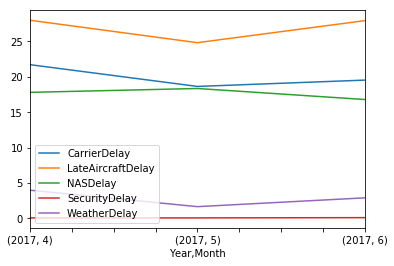

In [8]:
plt.figure()
table.plot()
plt.show()

In [9]:
df_trim.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'UniqueCarrier', 'AirlineID', 'Carrier', 'TailNum', 'FlightNum',
       'OriginAirportID', 'OriginAirportSeqID', 'OriginCityMarketID', 'Origin',
       'OriginCityName', 'OriginState', 'OriginStateFips', 'OriginStateName',
       'OriginWac', 'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID',
       'Dest', 'DestCityName', 'DestState', 'DestStateFips', 'DestStateName',
       'DestWac', 'CRSDepTime', 'DepTime', 'DepDelay', 'DepDelayMinutes',
       'DepDel15', 'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOut',
       'WheelsOff', 'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrTime', 'ArrDelay',
       'ArrDelayMinutes', 'ArrDel15', 'ArrivalDelayGroups', 'ArrTimeBlk',
       'Cancelled', 'CancellationCode', 'Diverted', 'CRSElapsedTime',
       'ActualElapsedTime', 'AirTime', 'Flights', 'Distance', 'DistanceGroup',
       'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay',

In [10]:
#Numbers of airport in the dataset

print("number of origin airports in the dataset: ", len(set(df_trim.Origin)))
print("number of destination airports in the dataset: ", len(set(df_trim.Dest)))

number of origin airports in the dataset:  310
number of destination airports in the dataset:  310


In [11]:
#Count no. of flights by carriers

df_trim.Carrier.value_counts(dropna=False)

WN    340697
DL    238821
AA    228113
OO    176344
UA    146964
EV     91771
B6     76043
AS     47747
NK     39435
F9     25346
HA     20336
VX     17461
Name: Carrier, dtype: int64

### Find top 20 busiest origin airports data and store into new list 'orig_airport_list

In [12]:
#First 20 busiest airports as origin and put into new list 'orig_airport_list

df_airport_count=df_trim.Origin.value_counts(dropna=False)
orig_airport_list = list(df_airport_count.index.values)[:20]
orig_airport_list

['ATL',
 'ORD',
 'DEN',
 'LAX',
 'DFW',
 'SFO',
 'PHX',
 'LAS',
 'MSP',
 'SEA',
 'MCO',
 'IAH',
 'BOS',
 'DTW',
 'EWR',
 'CLT',
 'SLC',
 'BWI',
 'JFK',
 'LGA']

In [13]:
#Select rows for those 20 airports only

df_trim = df_trim[df_trim['Origin'].isin(orig_airport_list)]

In [14]:
#First 20 busiest airports as destination

df_airport_count=df_trim.Dest.value_counts(dropna=False)
dest_airport_list = list(df_airport_count.index.values)[:20]
dest_airport_list

['LAX',
 'ORD',
 'ATL',
 'DEN',
 'SFO',
 'LAS',
 'DFW',
 'BOS',
 'SEA',
 'PHX',
 'MCO',
 'MSP',
 'EWR',
 'CLT',
 'DTW',
 'IAH',
 'SAN',
 'FLL',
 'JFK',
 'SLC']

In [15]:
#Add column IsDelay to flag whether that flight delayed or not

df_trim['IsDelay'] = np.where(df_trim['CarrierDelay'].isnull(), 0, 1)
df_trim.head()
df_trim.tail()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,UniqueCarrier,AirlineID,Carrier,TailNum,...,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,IsDelay
1449071,2017,2,6,30,5,2017-06-30,AS,19930,AS,N315AS,...,2306.0,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1449073,2017,2,6,30,5,2017-06-30,AS,19930,AS,N407AS,...,672.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1449074,2017,2,6,30,5,2017-06-30,AS,19930,AS,N612AS,...,1024.0,5,0.0,0.0,19.0,0.0,0.0,NaN,NaN,1
1449076,2017,2,6,30,5,2017-06-30,AS,19930,AS,N546AS,...,224.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1449077,2017,2,6,30,5,2017-06-30,AS,19930,AS,N553AS,...,1448.0,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [16]:
#Convert the flight date column into a datetime object

df_trim['FlightDate'] = pd.to_datetime(df_trim['FlightDate'])

In [17]:
type(df_trim['FlightDate'])

pandas.core.series.Series

In [18]:
df_trim=df_trim.sort_values(by=['FlightDate'])

In [19]:
df_trim = df_trim.reset_index(drop=True)

In [21]:
#Check dep time is in '00' hours

df_trim[df_trim['CRSDepTime'] <=99].CRSDepTime.count()

3470

In [22]:
df_trim[df_trim['Origin'].isin(df_trim.Origin.value_counts(dropna=False).head(20).index.values)]['OriginState'].unique()

array(['GA', 'NJ', 'NY', 'MA', 'CA', 'IL', 'NV', 'FL', 'WA', 'CO', 'MD',
       'UT', 'MI', 'NC', 'TX', 'AZ', 'MN'], dtype=object)

In [23]:
#Convert CRSDepTime to str and fill empty with '0' to make up length of 4 chars

df_trim.CRSDepTime = df_trim.CRSDepTime.apply(lambda x: str(int(x)).zfill(4))
df_trim.info()
df_trim.CRSDepTime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804568 entries, 0 to 804567
Data columns (total 64 columns):
Year                    804568 non-null int64
Quarter                 804568 non-null int64
Month                   804568 non-null int64
DayofMonth              804568 non-null int64
DayOfWeek               804568 non-null int64
FlightDate              804568 non-null datetime64[ns]
UniqueCarrier           804568 non-null object
AirlineID               804568 non-null int64
Carrier                 804568 non-null object
TailNum                 804287 non-null object
FlightNum               804568 non-null int64
OriginAirportID         804568 non-null int64
OriginAirportSeqID      804568 non-null int64
OriginCityMarketID      804568 non-null int64
Origin                  804568 non-null object
OriginCityName          804568 non-null object
OriginState             804568 non-null object
OriginStateFips         804568 non-null int64
OriginStateName         804568 non-null object

0         1953
1         1505
2         1455
3         1835
4         1805
5         0544
6         1600
7         1655
8         1355
9         1042
10        0805
11        0611
12        1300
13        0746
14        2125
15        1700
16        2051
17        1418
18        1258
19        0655
20        1135
21        0811
22        2100
23        1405
24        1425
25        0710
26        0600
27        0759
28        1630
29        1235
          ... 
804538    1530
804539    0800
804540    1930
804541    1530
804542    1230
804543    1040
804544    0730
804545    0830
804546    2205
804547    1819
804548    1847
804549    0745
804550    1330
804551    1020
804552    1320
804553    2029
804554    0020
804555    1430
804556    1001
804557    0730
804558    2320
804559    0120
804560    0505
804561    1319
804562    2205
804563    2100
804564    1734
804565    1400
804566    1755
804567    1440
Name: CRSDepTime, Length: 804568, dtype: object

In [24]:
#Find the timezone of the airport and put in new column 'OriginTimeZone'

df_trim['OriginTimeZone'] = df_trim['OriginState'].apply(lambda x: str(us.states.lookup(x).time_zones[0]))

#### Section below will convert local time to UTC time, calculate no. of flight delayed on previous day at the airport and count no. of departure flight at the airport today.

In [25]:
#Calculate no. of delay in previous day and put in new column 'previous_date_delay'
%time

def cal_previous_date_delay(row, thisdate, origin, ndays, dfrow):
    dateBeforeNdays = thisdate - pd.DateOffset(days=ndays)
    dfrowNdays = dfrow[(dfrow['FlightDate'] == dateBeforeNdays) & (dfrow['Origin'] == origin)]
    apt_preiviousday_no_of_delay = dfrowNdays['IsDelay'].sum()
    #print([thisdate, origin, apt_preiviousday_no_of_delay])
    return apt_preiviousday_no_of_delay

def convert_to_utc(flightdate, deptime, state, origintimezone):
    """This combine flightdate and deptime, then convert to UTC time by State"""
    hour = deptime[:2]
    minute = deptime[2:]
    
    #print(flightdate, deptime, hour, minute)
    combinedflghttime = flightdate.replace(hour=int(hour),minute=int(minute))
    #print(combinedflghttime)
    #DepTimezone = str(us.states.lookup(DepState).time_zones[0])
    local = pytz.timezone(origintimezone)
    local_dt = local.localize(combinedflghttime, is_dst=None)
    utc_dt = local_dt.astimezone(pytz.utc)
    return utc_dt    

#Create 3 new columns for matching
df_trim['AptPreviousDateDelay'] = np.nan
df_trim['AptNoOfFlight'] = np.nan
df_trim['UTCFlightDateTime'] = np.nan

for row in np.arange(len(df_trim)):
#for row in range(500):
    thisDate = df_trim.FlightDate[row]
    origin = df_trim.Origin[row]
    CRSDepTime = df_trim.CRSDepTime[row]
    DepState = df_trim.OriginState[row]
    OriginTimeZone = df_trim.OriginTimeZone[row]
    
    df_trim['AptPreviousDateDelay'][row] = cal_previous_date_delay(row, thisDate, origin, 1, df_trim)
    #print(df_trim.FlightDate[row], df_trim.Origin[row], df_trim[(df_trim['FlightDate'] == df_trim.FlightDate[row]) & (df_trim['Origin'] == df_trim.Origin[row])].FlightNum.count())
    df_trim['AptNoOfFlight'][row] = df_trim[(df_trim['FlightDate'] == df_trim.FlightDate[row]) & (df_trim['Origin'] == df_trim.Origin[row])].FlightNum.count()
    utc_str = str(convert_to_utc(thisDate, CRSDepTime, DepState, OriginTimeZone))[:13]
    #print(utc_str)
    df_trim['UTCFlightDateTime'][row] = utc_str
    if (row % 50000 == 0):
            print('Data processed: ', row, ' rows')
    elif (row % 1000 == 0):
            print('*')


CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 3.1 µs


/Users/cuthlo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/cuthlo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/cuthlo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/cuthlo/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying 

Data processed:  0  rows
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
Data processed:  50000  rows
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
Data processed:  100000  rows
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
Data processed:  150000  rows
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
Data processed:  200000  rows
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
Data processed:  250000  rows
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
Data processed:  300000  rows
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
Data processed:  350000  rows
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*


In [26]:
df_trim[(df_trim['FlightDate'] == df_trim.FlightDate[row]) & (df_trim['Origin'] == df_trim.Origin[row])].FlightNum.count()

445

### Load top 20 origin airports weather into new dataframe


In [27]:
#Load top 20 origin airports weather into new dataframe

print('Loading weather data of',orig_airport_list[0])
dfwx = pd.read_csv('data/weatherdata/'+orig_airport_list[0]+'_201507310000_201707310000.txt')

for airport in orig_airport_list[1:]:
    print('Loading weather data of',airport)
    dfwx = pd.concat([dfwx, pd.read_csv('data/weatherdata/'+airport+'_201507310000_201707310000.txt')])
    
dfwx['DateHr'] = dfwx.valid.str[:13]
dfwx = dfwx.reset_index()
dfwx = dfwx.drop('index', axis=1)

Loading weather data of ATL


/Users/cuthlo/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Loading weather data of ORD


/Users/cuthlo/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Loading weather data of DEN
Loading weather data of LAX


/Users/cuthlo/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (10,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Loading weather data of DFW
Loading weather data of SFO
Loading weather data of PHX
Loading weather data of LAS
Loading weather data of MSP
Loading weather data of SEA
Loading weather data of MCO
Loading weather data of IAH
Loading weather data of BOS
Loading weather data of DTW
Loading weather data of EWR
Loading weather data of CLT
Loading weather data of SLC
Loading weather data of BWI
Loading weather data of JFK
Loading weather data of LGA


In [28]:
type(dfwx)

pandas.core.frame.DataFrame

In [29]:
dfwx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2856562 entries, 0 to 2856561
Data columns (total 25 columns):
station       object
valid         object
lon           float64
lat           float64
tmpf          object
 dwpf         object
 relh         object
 drct         object
 sknt         object
 p01i         object
 alti         object
 mslp         object
 vsby         object
 gust         object
 skyc1        object
 skyc2        object
 skyc3        object
 skyc4        object
 skyl1        object
 skyl2        object
 skyl3        object
 skyl4        object
 presentwx    object
 metar        object
DateHr        object
dtypes: float64(2), object(23)
memory usage: 544.8+ MB


In [30]:
dfwx.head(20)

#Remove rows of 'tmpf' with value 'M' 
dfwx_trim = dfwx[~(dfwx.tmpf == 'M')]

In [32]:
dfwx.index[dfwx.isnull().all(1)]

Int64Index([], dtype='int64')

In [33]:
#Check any empty fields

df_trim.index[df_trim.isnull().all(1)]

Int64Index([], dtype='int64')

### Merge Flight Dataset with Weather Dataset with key Origin and UTCFlightDateTime with station and DateHr


In [34]:
#Merge Flight Dataset with Weather Dataset with key Origin and UTCFlightDateTime with station and DateHr

merged = pd.merge(left=df_trim, right=dfwx_trim, how='left', left_on=['Origin', 'UTCFlightDateTime'],
                   right_on=['station', "DateHr"])
merged.shape

(947191, 93)

In [35]:
merged[['FlightDate','FlightNum','Carrier','Origin','UTCFlightDateTime','DateHr','station',' metar']]

,FlightDate,FlightNum,Carrier,Origin,UTCFlightDateTime,DateHr,station,metar
0,2017-04-01,5555,EV,ATL,2017-04-01 23,2017-04-01 23,ATL,KATL 012352Z 31008KT 10SM FEW200 SCT250 22/08 ...
1,2017-04-01,927,B6,EWR,2017-04-01 19,2017-04-01 19,EWR,KEWR 011951Z 35016G20KT 10SM SCT038 BKN050 09/...
2,2017-04-01,925,B6,JFK,2017-04-01 18,2017-04-01 18,JFK,KJFK 011851Z 34018KT 10SM OVC024 07/02 A2985 R...
3,2017-04-01,921,B6,BOS,2017-04-01 22,2017-04-01 22,BOS,KBOS 012224Z 36014KT 2 1/2SM -SN BR BKN010 OVC...
4,2017-04-01,921,B6,BOS,2017-04-01 22,2017-04-01 22,BOS,KBOS 012254Z 35010KT 2 1/2SM -SN BR BKN010 OVC...
5,2017-04-01,918,B6,JFK,2017-04-01 22,2017-04-01 22,JFK,KJFK 012251Z 02009KT 10SM BKN045 BKN050 BKN070...
6,2017-04-01,917,B6,BOS,2017-04-01 09,2017-04-01 09,BOS,KBOS 010907Z 06021KT 4SM -RA BR SCT008 OVC014 ...
7,2017-04-01,917,B6,BOS,2017-04-01 09,2017-04-01 09,BOS,KBOS 010927Z 06020G27KT 4SM -RA BR BKN009 OVC0...
8,2017-04-01,917,B6,BOS,2017-04-01 09,2017-04-01 09,BOS,KBOS 010940Z 06020G29KT 4SM -RA BR BKN010 OVC0...
9,2017-04-01,917,B6,BOS,2017-04-01 09,2017-04-01 09,BOS,KBOS 010954Z 06020KT 4SM -RA BR SCT009 OVC014 ...


In [36]:
merged[merged.DateHr.isnull()]

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,UniqueCarrier,AirlineID,Carrier,TailNum,...,skyc2,skyc3,skyc4,skyl1,skyl2,skyl3,skyl4,presentwx,metar,DateHr
67298,2017,2,4,7,5,2017-04-07,UA,19977,UA,N11206,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67802,2017,2,4,7,5,2017-04-07,DL,19790,DL,N977AT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67978,2017,2,4,7,5,2017-04-07,UA,19977,UA,N411UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68272,2017,2,4,7,5,2017-04-07,DL,19790,DL,N313US,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68872,2017,2,4,7,5,2017-04-07,AA,19805,AA,N3JPAA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68878,2017,2,4,7,5,2017-04-07,DL,19790,DL,N3743H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69750,2017,2,4,7,5,2017-04-07,AA,19805,AA,N3NMAA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70545,2017,2,4,7,5,2017-04-07,DL,19790,DL,N839DN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71391,2017,2,4,7,5,2017-04-07,WN,19393,WN,N269WN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71397,2017,2,4,7,5,2017-04-07,WN,19393,WN,N423WN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
merged[(merged['FlightDate'] == '2017-07-13') & (merged['TailNum'] == 'N849UA')]

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,UniqueCarrier,AirlineID,Carrier,TailNum,...,skyc2,skyc3,skyc4,skyl1,skyl2,skyl3,skyl4,presentwx,metar,DateHr


In [38]:
#Remove rows with 'DateHr' are NaN

merged_trim = merged[~(merged.DateHr.isnull())]
merged_trim.shape

(946418, 93)

In [39]:
#Export to CSV file
merged_trim.to_csv('merged_trim_dataset.csv')